<h1>Text Mining with Hathitrust Feature Reader</h1>
<h5>Created by Matt Steele, WVU</h5>
<h5>Contact: <a href ="https://directory.lib.wvu.edu/employee/210" target="_blank">https://directory.lib.wvu.edu/employee/210</a><h5>
<hr />

<div style ="background-color:#f0f0f0; border:2px solid; width:75%; padding: 2.5%;">
    <h3>This workshop was developed using the following tutorials</h3>
    <ul>
        <li>Peter Organisciak and Boris Capitanu, "Text Mining in Python through the HTRC Feature Reader," Programming Historian 5 (2016), https://doi.org/10.46430/phen0058.</li>
        <li>HTRC Feature Reader Github Documentation Examples - https://github.com/htrc/htrc-feature-reader/tree/master/examples</li>
    </ul>


</div>

<h2>About Hathitrust</h2>
<p>The HathiTrust holds nearly 15 million digitized volumes from libraries around the world.</p>
<ul><li><a href = "https://databases.lib.wvu.edu/connect/1476909287">Hathitrust</a></li></ul>

<h2>About Hathitrust Research Center</h2>
<p>Provides tools that enables computational analysis of works in the HathiTrust Digital Library (HTDL) to facilitate non-profit research and educational uses of the collection.</p>
<ul><li><a href="https://analytics.hathitrust.org/">Hathitrust Research Center</a></li></ul>

<h2>About Feature Reader</h2>
<p>As part of its mission, the HTRC has released the Extracted Features (EF) dataset containing features derived for every page of 17 million ‘volumes’ (a generalized term referring to the different types of materials in the HathiTrust collection, of which books are the most prevalent type).</p>
<p>A feature is a quantifiable marker of something measurable, a datum. A computer cannot understand the meaning of a sentence implicitly, but it can understand the counts of various words and word forms, or the presence or absence of stylistic markers, from which it can be trained to better understand text. Many text features are non-consumptive in that they don’t retain enough information to reconstruct the book text.</p>
<p>The FeatureReader object is the interface for loading the dataset files and making sense of them. The files are originally formatted in a notation called JSON and compressed, which FeatureReader makes sense of and returns as Volume objects. A Volume is a representation of a single book or other work. This is where you access features about a work. Many features for a volume are collected from individual pages; to access Page information, you can use the Page object.</p>
<ul><li><a href ="http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html">Feature Reader Documentation</a></li></ul>

<h3>Installing Feature Reader</h3>

In [ ]:
conda install -c htrc htrc-feature-reader

<h3>Calling Feature Reader Packages</h3>
<ul>
    <li><a href ="http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html">Feature Reader documentation</a></li>
    <li><a href = "https://wiki.htrc.illinois.edu/pages/viewpage.action?pageId=79069329">Volume documentation</a></li>
    <li><a href = "http://htrc.github.io/htrc-feature-reader/htrc_features/utils.m.html">utils documentation</a></li>
</ul>

In [ ]:
import htrc_features
from htrc_features import Volume
from htrc_features import utils
from htrc_features import FeatureReader

<h3>Additional Packages</h3>

In [ ]:
pip install wordcloud

In [ ]:
pip install pandas

In [ ]:
pip install glob

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

<h2>Scraping Volume information</h2>
<p>A Volume contains information about the current work and access to the pages of the work. All the metadata fields from the HTRC JSON file are accessible as properties of the volume object.</p>

In [ ]:
vol = Volume("lesson_files/data/mdp.39015003719849.json.bz2")
vol

In [ ]:
Volume("mdp.39015003719849.json.bz2")

In [ ]:
for htid in ["hvd.32044013656053", "hvd.32044013656061"]:
    vol = Volume(htid)
    print(vol.title, vol.enumeration_chronology)

<p>While the majority of the HTRC Extracted Features dataset is features, quantitative abstractions of a book’s written content, there is also a small amount of metadata included for each volume. Metadata attributes include:</p>
<ul>
    <li>Volume.title: The title of the volume. </li>
    <li>Volume.id: A unique identifier for the volume in the HathiTrust and the HathiTrust Research Center. </li>
    <li>Volume.year: The publishing date of the volume.</li>
    <li>Volume.language: The classified language of the volume.</li>
    <li>Volume.oclc: The OCLC control number(s). The volume id can be used to pull more information from other sources.</li> 
</ul>        

<h3>TAB button: Viewing options</h3>
<p>Use the TAB button after your named variable <vol.> to see what options are available to view.</p>

In [ ]:
print(vol.title, ...)

<h3>Accessing the Volume</h3>
<p>The scanned copy of the book can be found from the HathiTrust Digital Library, when available, by accessing http://hdl.handle.net/2027/{VOLUME ID}. In the feature reader, this url is retrieved by calling vol.handle_url:</p>

In [ ]:
print(vol.handle_url)

<h3>Viewing Tokens per Page</h3>
<p>This is the Extracted Features dataset, so the features are easily accessible. To most popular is token counts, which are returned as a Pandas DataFrame. Listed in the table are page numbers and the count of words on each page.</p>

In [ ]:
token_count = vol.tokens_per_page()
token_count

<h3>Plot Words per Page</h3>
<p>With only two dimensions, it is trivial to plot the number of words per page. The table structure holding the data has a plot method for data graphics. Without extra arguments, tokens.plot() will assume that you want a line chart with the page on the x-axis and word count on the y-axis.</p>

In [ ]:
%matplotlib inline
token_count.plot()

<h3>Viewing Tokens in the Volume</h3>
<p>The Extracted Features dataset also provides token counts with much more granularity: for every part of speech (e.g. noun, verb) of every occurring capitalization of every word of every section (i.e. header, footer, body) of every page of the volume.</p>

In [ ]:
tl = vol.tokenlist()
tl.sample(20)

<p>The columns in bold are an index. Unlike the typical one-dimensional index seen before, here there are four dimensions to the index: page, section, token, and pos. This row says that for the nth page, in the n section (i.e. ignoring any words in the header or footer), the word ‘n’ occurs n time as an plural noun. The part-of-speech tag (POS) follows the Penn Treebank definitions.</p>
<ul><li><a href = "https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html">Penn Treebank definition</a></li></ul>
<p> The HTRC Feature Reader refers to “pages” as the nth scanned image of the volume, not the actual number printed on the page. This is why “page 1” for this example is the cover.</p>

<h3>Cleaning the Text</h3>
<p>Tokenlists can be retrieved with arguments that combine information by certain dimensions, such as case, pos, or page. For example, case=False specified that “Jaguar” and “jaguar” should be counted together. You may also notice that, by default, only ‘body’ is returned, a default that can be overridden.</p>
<p>Let's see what happens if we play with the various commands:</p>
<ul>
    <li>vol.tokenlist(case=False)</li>
    <li>vol.tokenlist(pos=False)</li>
    <li>vol.tokenlist(pages=False, case=False, pos=False)</li>
    <li>vol.tokenlist(section='header')</li> 
    <li>vol.tokenlist(section='group')</li>
    </ul>
    
<p>Details for these arguments are available in the code documentation for the Feature Reader.</p>


In [ ]:
#run test here

<h3>Selecting Subsets of a DataFrame by a Condition</h3>
<p>Because EF creates dataframes of the information in a volume, we can subset individual rows of a DataFrame. This allows us to provide a series of True/False values to the DataFrame, formatted in square brackets. When True, the DataFrame returns that row; when False, the row is excluded from what is returned.</p>

In [ ]:
tl_simple = vol.tokenlist(pos=False, pages=False, case=False)
# .sample(5) returns five random words from the full result
tl_simple.sample(5)

Let's see what words are occur greater than 100 times in the volumes

In [ ]:
tl_simple["count"] > 100

Let's use the same code to create a new dataframe that includes only the words that occur over 100 times.

In [ ]:
matches = tl_simple['count'] > 100
tl_simple[matches].sample(25)

<h3>Section Features</h3>
<p>Explore the format of pages with the section_features function</p> 

In [71]:
section_df = vol.section_features()
section_df

,tokenCount,lineCount,emptyLineCount,capAlphaSeq,sentenceCount
page,,,,,
2,8,8,2,2,NaN
3,118,18,0,5,5.0
7,24,9,0,5,NaN
8,63,9,0,3,2.0
9,73,8,0,2,3.0
...,...,...,...,...,...
349,403,92,0,27,2.0
350,416,98,0,18,3.0
351,400,93,0,22,3.0


<AxesSubplot:xlabel='page'>

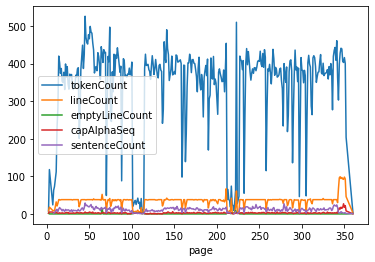

In [79]:
section_df.plot()

<AxesSubplot:xlabel='page'>

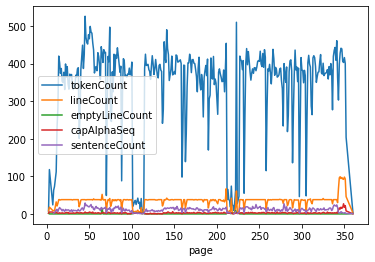

In [79]:
section_df.plot()

<h3>Chunking</h3>
<p>The process of splitting text into smaller or larger pieces before analysis. May be divided by paragraph, chapter, or a chosen number of words. If you're working in an instance where you hope to have comparably sized document units, you can use 'chunking' to roll pages into chunks that aim for a specific length.</p>

In [91]:
by_chunk = vol.tokenlist(chunk=True, chunk_target=10000)
print(by_chunk.sample(10))
# Count words per chunk
by_chunk.groupby(level='chunk').sum()

                                count
chunk section token        pos       
1     body    floatable    JJ       1
2     body    clothes      NNS      1
5     body    span         NN       1
11    body    selfatrophy  NN       1
4     body    guaranteed   VBN      1
8     body    consumed     VBN      1
4     body    something    NN       4
1     body    demonstrates VBZ      1
2     body    Suddenly     RB       1
8     body    obvious      JJ       3


,count
chunk,
1,8575
2,10015
3,9904
4,10040
5,10043
6,10159
7,9756
8,9998
9,9900


<h3>Read multiple files</h3>
<p>We can use the package glob to load multiple files into python for analysis.</p>

In [ ]:
import glob
paths = glob.glob('lesson_files/data/*bz2', recursive=True)
fr = FeatureReader(paths)
for vol in fr.volumes():
    print(vol)

In [ ]:
vol = next(fr.volumes())
tl = vol.tokenlist(pages=False)
tl

<h3>Using Pandas Functions to Filter to Only Proper Nouns</h3>
<p>We'll set the first volume of the FeatureReader to vol and return a tokenlist, without page-level information.</p>
<p>I'm interested in the occurance of words across years, so we'll add a date column and absorb it into the MultiIndex as a new level. At the same time, we'll drop the section level, since it's all redundant information. You can read about Pandas MultIndexes in the Pandas documentation.</p>
<ul><li><a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html">Pandas MultIndexes in the Pandas documentation</a></li></ul>

In [ ]:
# Remove 'section', which is level 0 of the MultiIndex
tl.index = tl.index.droplevel(0)
# Add date column, convert to index level, and reorder levels
tl['date'] = vol.year
tl = tl.set_index('date', append=True).reorder_levels(['date', 'token', 'pos'])
tl

<p>The Extracted Features dataset using the part-of-speech tags from the Penn Treebank. In Penn, proper nouns are labelled NNP and plural proper nouns are labelled NNPS.</p>
<ul><li><a href = "https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html">Penn Treebank definition</a></li></ul>

<p>To get all the proper nouns, we'll 'slice' all the columns that have NNP or NNPS as the part-of-speech (POS) value.</p>

<p>Slicing involves using the .loc[]. Note that we ask for idx[:,:,('NNP', 'NNPS')] below. This is asking, in order, for<p>

<ol><li>any matching date</li>
    <li>any matching token</li>
    <li>only pos rows that match NNP or NNPS</li></ol>

In [ ]:
idx = pd.IndexSlice
proper_nouns = tl.loc[idx[:,:,('NNP', 'NNPS')],]
# Show only proper nouns that occur more than once
proper_nouns[proper_nouns['count'] > 1].sort_values('count', ascending=False)[:10]

<h3>Retrieve Proper Nouns over Multiple Volumes</h3>

In [ ]:
idx = pd.IndexSlice

def get_proper_nouns(vol):
    tl = vol.tokenlist(pages=False)
    tl.index = tl.index.droplevel(0)
    tl['date'] = vol.year
    tl = tl.set_index('date', append=True).reorder_levels(['date', 'token', 'pos'])
    try:
        proper_nouns = tl.loc[idx[:,:,('NNP', 'NNPS')],]
        proper_nouns.index = proper_nouns.index.droplevel(2)
        return proper_nouns[proper_nouns['count'] > 1]
    except:
        return pd.DataFrame()

In [ ]:
nnp_dfs = []
for vol in fr.volumes():
    nnp_dfs.append(get_proper_nouns(vol))
all_nnp = pd.concat(nnp_dfs)
del nnp_dfs 

In [ ]:
all_nnp.sort_values(['count', 'date'], ascending=False)[:100]

In [ ]:
nnp_flat = all_nnp.reset_index()
nnp_flat

In [ ]:
text = " ".join(i for i in nnp_flat.token)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=200).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='gaussian')
plt.axis("off")
plt.show()

<h3>Sentiment Analysis using AFINN</h3>
<p>Load up "Operating Manual for Spaceship"</p>

In [ ]:
vol = Volume("lesson_files/data/mdp.39015003719849.json.bz2")
vol

<p>Load Up the AFINN dataframe</p>
<ul><li><a href ="http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010">Download AFINN Dataframe</a></li></ul> 

In [ ]:
afinn = pd.read_csv("AFINN-111.txt", sep='\t', names=['token','valence'])
afinn[::600]

<h3>Get the tokenlist</h3>
<p>Because AFINN is case-insensitive and doesn't take part-of-speech into account, we don't need that information. We won't be doing any slicing by the multi-index and hope to group by page numbers, so we'll also convert the index to columns with reset_index() and drop the unnecessary section column. </p>

In [ ]:
tl = vol.tokenlist(pos=False, case=False)\
        .reset_index().drop(['section'], axis=1)
tl.columns = ['page', 'token', 'count']
tl

<h3>Clean up the Data</h3>
<p>Use the group by function to group the tokens by page and filter out low used words. We only want to classify full pages, so let's see the average page length and exclude pages that have less words than 80% of the average.</p>

In [ ]:
meanpages = tl.groupby('page').sum().mean()['count']
tl2 = tl.groupby('page').filter(lambda x: x['count'].sum() > meanpages*0.8)
tl2

<h3>Merge the Dataframes</h3>
<p>Merge the AFINN to the TL and add the sentiment scores for all words that have a valence assigned in AFINN.</p>

In [ ]:
tl3 = pd.merge(tl, afinn)
# Account for multiple occurrances of the same word
tl3['sentiment_weight'] = tl3['count'] * tl3['valence']
perpage = tl3.drop(['count', 'valence'], axis=1).groupby(['page'], as_index=False).sum()
perpage[:100:20]

<h3>Plot the Sentiment</h3>

In [ ]:
perpage.plot(x='page',y=['sentiment_weight'], title="Sentiment through Operating Manual for Planet Earth by Page", xlabel="Page")